# WQD7005 - Data Mining
## Lab Exersice 3

#### Matrix Number : 17043640

#### Name                 : Gunasegarran Magadevan

#### 0. Prequisite
Perform the following steps before trying the exercises:
1. Import pandas as "pd" and load the lab1 dataset into "df".
2. Print dataset information to refresh your memory.
3. Run preprocess_data function on the dataframe to perform preprocessing steps discussed last week.
4. Split your data into training and test with 70:30 distribution, stratified, random state 0.


In [1]:
import pandas as pd

 # read the dataset
df = pd.read_csv('lab1.csv')
df.head()

,TargetB,ID,TargetD,GiftCnt36,GiftCntAll,GiftCntCard36,GiftCntCardAll,GiftAvgLast,GiftAvg36,GiftAvgAll,...,PromCntCardAll,StatusCat96NK,StatusCatStarAll,DemCluster,DemAge,DemGender,DemHomeOwner,DemMedHomeValue,DemPctVeterans,DemMedIncome
0,0,14974,NaN,2,4,1,3,17.0,13.50,9.25,...,13,A,0,0,NaN,F,U,0,0,0
1,0,6294,NaN,1,8,0,3,20.0,20.00,15.88,...,24,A,0,23,67.0,F,U,186800,85,0
2,1,46110,4.0,6,41,3,20,6.0,5.17,3.73,...,22,S,1,0,NaN,M,U,87600,36,38750
3,1,185937,10.0,3,12,3,8,10.0,8.67,8.50,...,16,E,1,0,NaN,M,U,139200,27,38942
4,0,29637,NaN,1,1,1,1,20.0,20.00,20.00,...,6,F,0,35,53.0,M,U,168100,37,71509


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from dm_tools import data_prep

def data_prep():
    
    # change DemCluster from interval/integer to nominal/str
    df['DemCluster'] = df['DemCluster'].astype(str)
    
    # change DemHomeOwner into binary 0/1 variable
    dem_home_owner_map = {'U':0, 'H': 1}
    df['DemHomeOwner'] = df['DemHomeOwner'].map(dem_home_owner_map)
    
    # denote errorneous values in DemMidIncome
    mask = df['DemMedIncome'] < 1
    df.loc[mask, 'DemMedIncome'] = np.nan
    
    # impute missing values in DemAge with its mean
    df['DemAge'].fillna(df['DemAge'].mean(), inplace=True)

    # impute med income using mean
    df['DemMedIncome'].fillna(df['DemMedIncome'].mean(), inplace=True)

    # impute gift avg card 36 using mean
    df['GiftAvgCard36'].fillna(df['GiftAvgCard36'].mean(), inplace=True)
    
    # drop ID and the unused target variable
    df.drop(['ID', 'TargetD'], axis=1, inplace=True)
    
    # one-hot encoding
    df = pd.get_dummies(df)
    
    return df

In [3]:
# auto import the python function from Lab_Exercise_2 path
from dm_tools import data_prep

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# preprocessing step
df = data_prep()

# target/input split
y = df['TargetB']
X = df.drop(['TargetB'], axis=1)

In [6]:
# setting random state
rs = 10

X_mat = np.asmatrix(X)
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

##### 1. Standardisation and Logistic Regression
Perform following operations and answer the following questions:

1. What is the difference between logistic regression and linear regression? 
    - In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values. In logistic regression, the outcome (dependent variable) has only a limited number of possible values. Logistic regression is used when the response variable is categorical in nature.

2. Describe how logistic regression perform its prediction. 
    - Logistic regression is a class of regression model for classification task. It is similar in structure with linear regression, yet to make a classification prediction, transform the prediction value using logistic function.

3. Write code to perform standardisation on your training and test dataset. 
4. What does standardisation do to your data? How does it benefit your regression model? 
5. Write code to fit a logistic regression model to your training data. How does it perform on the training and test data? Do you see any indication of overfitting?  
6. Write code to find the most important features in your model.

In [7]:
from sklearn.preprocessing import StandardScaler

# initialise a standard scaler object
scaler = StandardScaler()

# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

# use the statistic that you learned from training to transform test data
# NEVER learn from test data, this is supposed to be a set of dataset
# that the model has never seen before
X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min [[0.]], max [[13.]], mean 3.20 and std dev 2.13
Variable #1: min [[1.]], max [[89.]], mean 10.50 and std dev 8.95
Variable #2: min [[0.]], max [[9.]], mean 1.86 and std dev 1.59
Variable #3: min [[0.]], max [[41.]], mean 5.58 and std dev 4.73
Variable #4: min [[0.]], max [[450.]], mean 15.97 and std dev 12.07
After scaling
-------------
Variable #0: min -1.505311488472091, max 4.600729037733905, mean -0.00 and std dev 1.00
Variable #1: min -1.0623391496250907, max 8.7746107562059, mean -0.00 and std dev 1.00
Variable #2: min -1.1659811623481273, max 4.487429288703341, mean -0.00 and std dev 1.00
Variable #3: min -1.1795617205202689, max 7.485041166941727, mean -0.00 and std dev 1.00
Variable #4: min -1.3225650969557856, max 35.95505089608766, mean 0.00 and std dev 1.00


In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.5936578171091446
Test accuracy: 0.56194081211287
              precision    recall  f1-score   support

           0       0.56      0.57      0.57      1453
           1       0.56      0.55      0.56      1453

    accuracy                           0.56      2906
   macro avg       0.56      0.56      0.56      2906
weighted avg       0.56      0.56      0.56      2906



In [11]:
print(model.coef_)

[[ 8.56479317e-02  5.74631371e-02  9.58946027e-02 -7.69919083e-02
  -5.02902331e-02 -3.99709024e-02  7.37732317e-02 -5.92560335e-02
  -1.68292677e-01  2.80519442e-01 -1.39754466e-01  5.05070065e-02
   1.97683503e-01  4.77612140e-02  9.50116479e-02 -4.38436665e-01
   1.10063136e-01  5.51064382e-02  2.69872103e-02  1.25814151e-01
   4.53440991e-02 -2.50488747e-02 -2.30633992e-02  7.76561114e-02
  -2.66603966e-02 -7.16675987e-03  2.82366134e-02  5.92501477e-05
   4.95165519e-02  2.50354442e-02 -5.18832419e-02  2.46946960e-02
   2.03374611e-03  4.35110124e-03 -1.70204183e-04 -1.34981177e-03
  -2.41930044e-02  1.54508038e-02  2.44619453e-02 -5.98428132e-04
   9.42231360e-03  1.79364746e-02 -3.78661229e-02 -1.01825582e-02
  -1.30017508e-02  1.83649892e-02 -7.88115883e-03  8.93770163e-04
  -3.88925245e-04  1.77522198e-02  1.19328388e-02  2.45900873e-02
  -5.11924297e-02  1.11579624e-02 -4.77995044e-02 -1.00049707e-02
  -3.03188210e-03  3.13878856e-02 -1.14417950e-03 -1.78740259e-02
   3.76321

In [12]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

GiftCnt36 : 0.08564793174962608
GiftCntAll : 0.05746313706561374
GiftCntCard36 : 0.09589460268398801
GiftCntCardAll : -0.07699190827819781
GiftAvgLast : -0.050290233119574416
GiftAvg36 : -0.03997090240898992
GiftAvgAll : 0.07377323167980217
GiftAvgCard36 : -0.05925603345997621
GiftTimeLast : -0.1682926771803732
GiftTimeFirst : 0.2805194416639046
PromCnt12 : -0.13975446632323138
PromCnt36 : 0.050507006507283646
PromCntAll : 0.19768350336200508
PromCntCard12 : 0.047761214035901466
PromCntCard36 : 0.0950116479193831
PromCntCardAll : -0.43843666482865323
StatusCatStarAll : 0.11006313622974224
DemAge : 0.05510643817585782
DemHomeOwner : 0.026987210349390254
DemMedHomeValue : 0.1258141510282275


In [13]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns

# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', coef[i])

PromCntCardAll : -0.43843666482865323
GiftTimeFirst : 0.2805194416639046
PromCntAll : 0.19768350336200508
GiftTimeLast : -0.1682926771803732
PromCnt12 : -0.13975446632323138
DemMedHomeValue : 0.1258141510282275
StatusCatStarAll : 0.11006313622974224
GiftCntCard36 : 0.09589460268398801
PromCntCard36 : 0.0950116479193831
GiftCnt36 : 0.08564793174962608
StatusCat96NK_E : 0.07765611137901894
GiftCntCardAll : -0.07699190827819781
GiftAvgAll : 0.07377323167980217
GiftAvgCard36 : -0.05925603345997621
GiftCntAll : 0.05746313706561374
DemAge : 0.05510643817585782
DemCluster_47 : -0.052839125527293
DemCluster_10 : -0.051883241868346704
DemCluster_30 : -0.05119242969621726
PromCnt36 : 0.050507006507283646


In [14]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.5949852507374631
Test accuracy: 0.5650378527185134
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1453
           1       0.57      0.55      0.56      1453

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.56      2906
weighted avg       0.57      0.57      0.56      2906

{'C': 0.001}


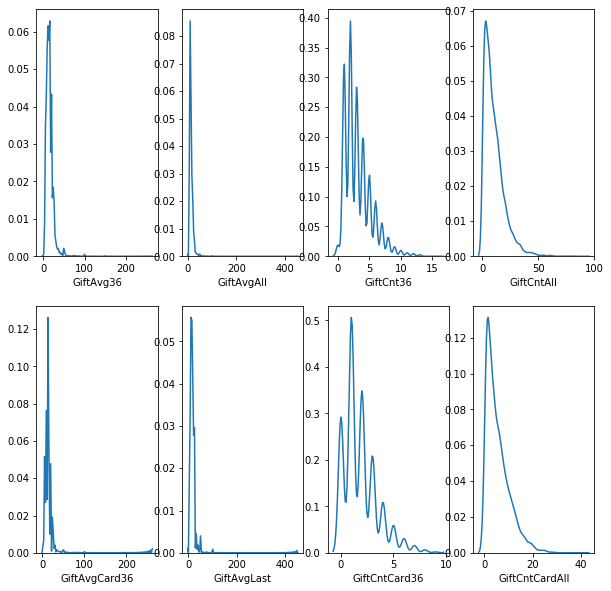

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_skewed_columns(df):
    # setting up subplots for easier visualisation
    f, axes = plt.subplots(2,4, figsize=(10,10), sharex=False)

    # gift avg plots
    sns.distplot(df['GiftAvg36'].dropna(), hist=False, ax=axes[0,0])
    sns.distplot(df['GiftAvgAll'].dropna(), hist=False, ax=axes[0,1])
    sns.distplot(df['GiftAvgCard36'].dropna(), hist=False, ax=axes[1,0])
    sns.distplot(df['GiftAvgLast'].dropna(), hist=False, ax=axes[1,1])

    # gift cnt plots
    sns.distplot(df['GiftCnt36'].dropna(), hist=False, ax=axes[0,2])
    sns.distplot(df['GiftCntAll'].dropna(), hist=False, ax=axes[0,3])
    sns.distplot(df['GiftCntCard36'].dropna(), hist=False, ax=axes[1,2])
    sns.distplot(df['GiftCntCardAll'].dropna(), hist=False, ax=axes[1,3])

    plt.show()
    
plot_skewed_columns(df)

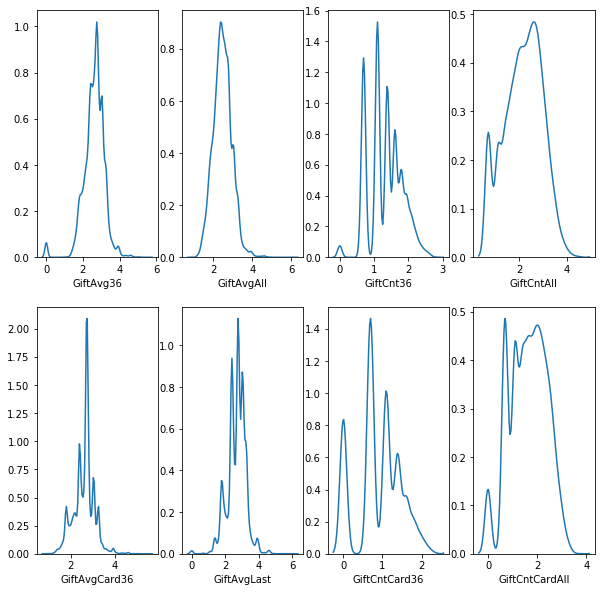

In [16]:
import numpy as np

# list columns to be transformed
columns_to_transform = ['GiftAvg36', 'GiftAvgAll', 'GiftAvgCard36', 'GiftAvgLast',
                        'GiftCnt36', 'GiftCntAll', 'GiftCntCard36', 'GiftCntCardAll']

# copy the dataframe
df_log = df.copy()

# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)

# plot them again to show the distribution
plot_skewed_columns(df_log)

In [17]:
# create X, y and train test data partitions
y_log = df_log['TargetB']
X_log = df_log.drop(['TargetB'], axis=1)
X_mat_log = np.asmatrix(X_log)
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y_log, test_size=0.3, stratify=y_log, 
                                                                    random_state=rs)

# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)

In [18]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))

y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.5938053097345133
Test accuracy: 0.5664143152099105
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1453
           1       0.57      0.55      0.56      1453

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906

{'C': 0.001}


In [19]:
from sklearn.feature_selection import RFECV

rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 85
Number of features after elimination 40


In [20]:
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)

In [21]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train_sel, y_train))
print("Test accuracy:", cv.score(X_test_sel, y_test))

y_pred = cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.5936578171091446
Test accuracy: 0.5688231245698555
              precision    recall  f1-score   support

           0       0.57      0.58      0.57      1453
           1       0.57      0.56      0.56      1453

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906

{'C': 100}


In [22]:
# running RFE + log transformation
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10)
rfe.fit(X_train_log, y_train_log) # run the RFECV on log transformed dataset

# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)

# select features from log transformed dataset
X_train_sel_log = rfe.transform(X_train_log)
X_test_sel_log = rfe.transform(X_test_log)

# init grid search CV on transformed dataset
params = {'C': [pow(10, x) for x in range(-6, 4)]}
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_sel_log, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_log, y_test_log))

y_pred_log = cv.predict(X_test_sel_log)
print(classification_report(y_test_log, y_pred_log))

# print parameters of the best model
print(cv.best_params_)

Original feature set 85
Number of features after elimination 41
Train accuracy: 0.5933628318584071
Test accuracy: 0.5660701995870613
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1453
           1       0.57      0.56      0.56      1453

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906

{'C': 0.1}


In [23]:
from sklearn.tree import DecisionTreeClassifier

# similar parameters with the last practical
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(2, 7),
          'min_samples_leaf': range(20, 60, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train_log, y_train_log)

print(cv.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}


In [24]:
from dm_tools import analyse_feature_importance

# analyse feature importance from the tuned decision tree against log transformed X
analyse_feature_importance(cv.best_estimator_, X_log.columns)

GiftCnt36 : 0.32372028991803176
DemMedHomeValue : 0.16870399488848986
GiftAvgLast : 0.13715027943543454
GiftTimeLast : 0.07216895789175108
StatusCatStarAll : 0.04624807594062364
GiftCntAll : 0.04526431066083868
GiftCntCardAll : 0.04444007634482767
PromCntCardAll : 0.038352830083886735
DemPctVeterans : 0.029606101805632952
PromCnt36 : 0.018147095366402428
GiftAvgAll : 0.017372969310631516
StatusCat96NK_A : 0.016862957062736873
GiftTimeFirst : 0.014129096904096769
GiftAvgCard36 : 0.013209693354314394
PromCntCard12 : 0.00872994822258077
PromCnt12 : 0.005893322809720318
DemCluster_13 : 0.0
DemCluster_10 : 0.0
DemCluster_11 : 0.0
DemCluster_12 : 0.0


In [25]:
from sklearn.feature_selection import SelectFromModel

# use the trained best decision tree from GridSearchCV to select features
# supply the prefit=True parameter to stop SelectFromModel to re-train the model
selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train_log)
X_test_sel_model = selectmodel.transform(X_test_log)

print(X_train_sel_model.shape)

(6780, 14)


In [26]:
params = {'C': [pow(10, x) for x in range(-6, 4)]}

cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_sel_model, y_train_log)

print("Train accuracy:", cv.score(X_train_sel_model, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_model, y_test_log))

# test the best model
y_pred = cv.predict(X_test_sel_model)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

Train accuracy: 0.5817109144542773
Test accuracy: 0.5705437026841018
              precision    recall  f1-score   support

           0       0.57      0.58      0.58      1453
           1       0.57      0.56      0.57      1453

    accuracy                           0.57      2906
   macro avg       0.57      0.57      0.57      2906
weighted avg       0.57      0.57      0.57      2906

{'C': 0.01}
